# Installing Required Libraries

To ensure your **environment** has all the necessary **libraries** for this **GPA Prediction** project

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn textblob spacy


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Loading the Dataset

- Use `pandas` to **read the CSV file**.
- This code is used to correctly load and clean the `Academic.csv` file, especially when the **first row contains the actual column names**, not automatically detected by pandas.



In [84]:
import pandas as pd

df_raw = pd.read_csv("C:/Users/HS TRADER/Documents/Academic.csv", header=None)


df_raw.columns = df_raw.iloc[0]


df = df_raw[1:].reset_index(drop=True)


print(df.head())


0 Study Hours per Week Attendance Rate     Major High School GPA  \
0                21.95           79.64  Business            2.83   
1                28.61            50.5  Business            3.26   
2                24.11           73.79       NaN            3.56   
3                 21.8           85.44  Business             3.7   
4                16.95            52.2      Arts            3.63   

0 Extracurricular Activities Part-Time Job Library Usage per Week  \
0                          4            No                  16.87   
1                          1            No                   6.53   
2                          3            No                  17.04   
3                          4           Yes                  17.77   
4                          4            No                   5.33   

0 Online Coursework Engagement Sleep Hours per Night College GPA  
0                        11.22                  5.64         2.8  
1                         7.79            

# Preprocessing
**Rename Your DataFrame**

In [36]:
print(df_raw.columns)


Index(['Study Hours per Week', 'Attendance Rate', 'Major', 'High School GPA',
       'Extracurricular Activities', 'Part-Time Job', 'Library Usage per Week',
       'Online Coursework Engagement', 'Sleep Hours per Night', 'College GPA'],
      dtype='object', name=0)


**Missing Values Check**

In [41]:
# Check again to confirm missing values
print(df.isnull().sum())


0
Study Hours per Week            0
Attendance Rate                 0
Major                           0
High School GPA                 0
Extracurricular Activities      0
Part-Time Job                   0
Library Usage per Week          0
Online Coursework Engagement    0
Sleep Hours per Night           0
College GPA                     0
dtype: int64


# Fill numerical columns with mean

In [43]:
num_cols = ['Attendance Rate', 'Online Coursework Engagement', 'Sleep Hours per Night']
for col in num_cols:
    df[col] = df[col].astype(float)  # Ensure correct type
    df[col] = df[col].fillna(df[col].mean())


 # Fill categorical column ("Major") with mode

In [45]:
df['Major'] = df['Major'].fillna(df['Major'].mode()[0])


#  Label Encoding for Categorical Columns

In [47]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['Major', 'Part-Time Job']
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


In [48]:
print(df.isnull().sum())  # All should now show 0


0
Study Hours per Week            0
Attendance Rate                 0
Major                           0
High School GPA                 0
Extracurricular Activities      0
Part-Time Job                   0
Library Usage per Week          0
Online Coursework Engagement    0
Sleep Hours per Night           0
College GPA                     0
dtype: int64


 # Features and Target Variable

In [ ]:

X = df.drop('College GPA', axis=1)
y = df['College GPA']


 # Test Split

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


 # Feature Scaling

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#  Exploratory Data Analysis (EDA)
**GPA Distribution**

This step helps to understand how **GPA values are distributed** in the dataset.
-  It Helps to visually analyze the **spread**, **central tendency**, and **skewness** of GPA values.
- It Useful for identifying if the data is **normally distributed** or **biased** toward any particular range.

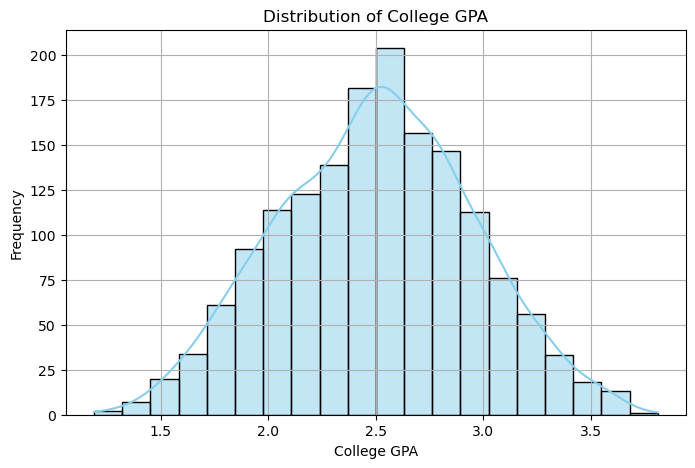

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(df["College GPA"], kde=True, bins=20, color="skyblue")
plt.title("Distribution of College GPA")
plt.xlabel("College GPA")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

 # Correlation Matrix
we used a **correlation matrix** to visualize how numeric features relate to each other, especially with the target variable **College GPA**.

- Helps **identify strong positive or negative relationships** between features and the target.
- Detects **multicollinearity** (features highly correlated with each other), which can affect model performance.
- Supports **feature selection**, allowing us to keep only meaningful predictors for better model accuracy.

This step improves our understanding of the data and guides model building.

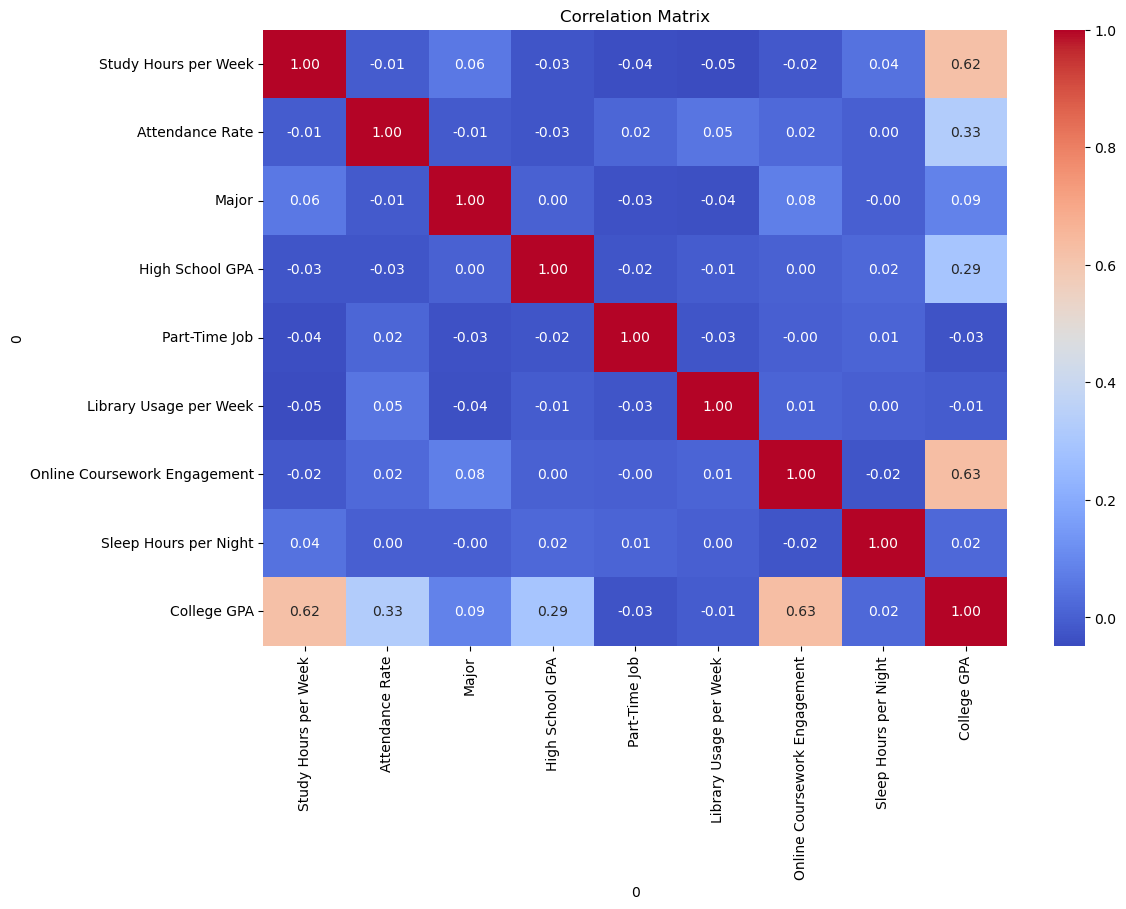

In [55]:

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

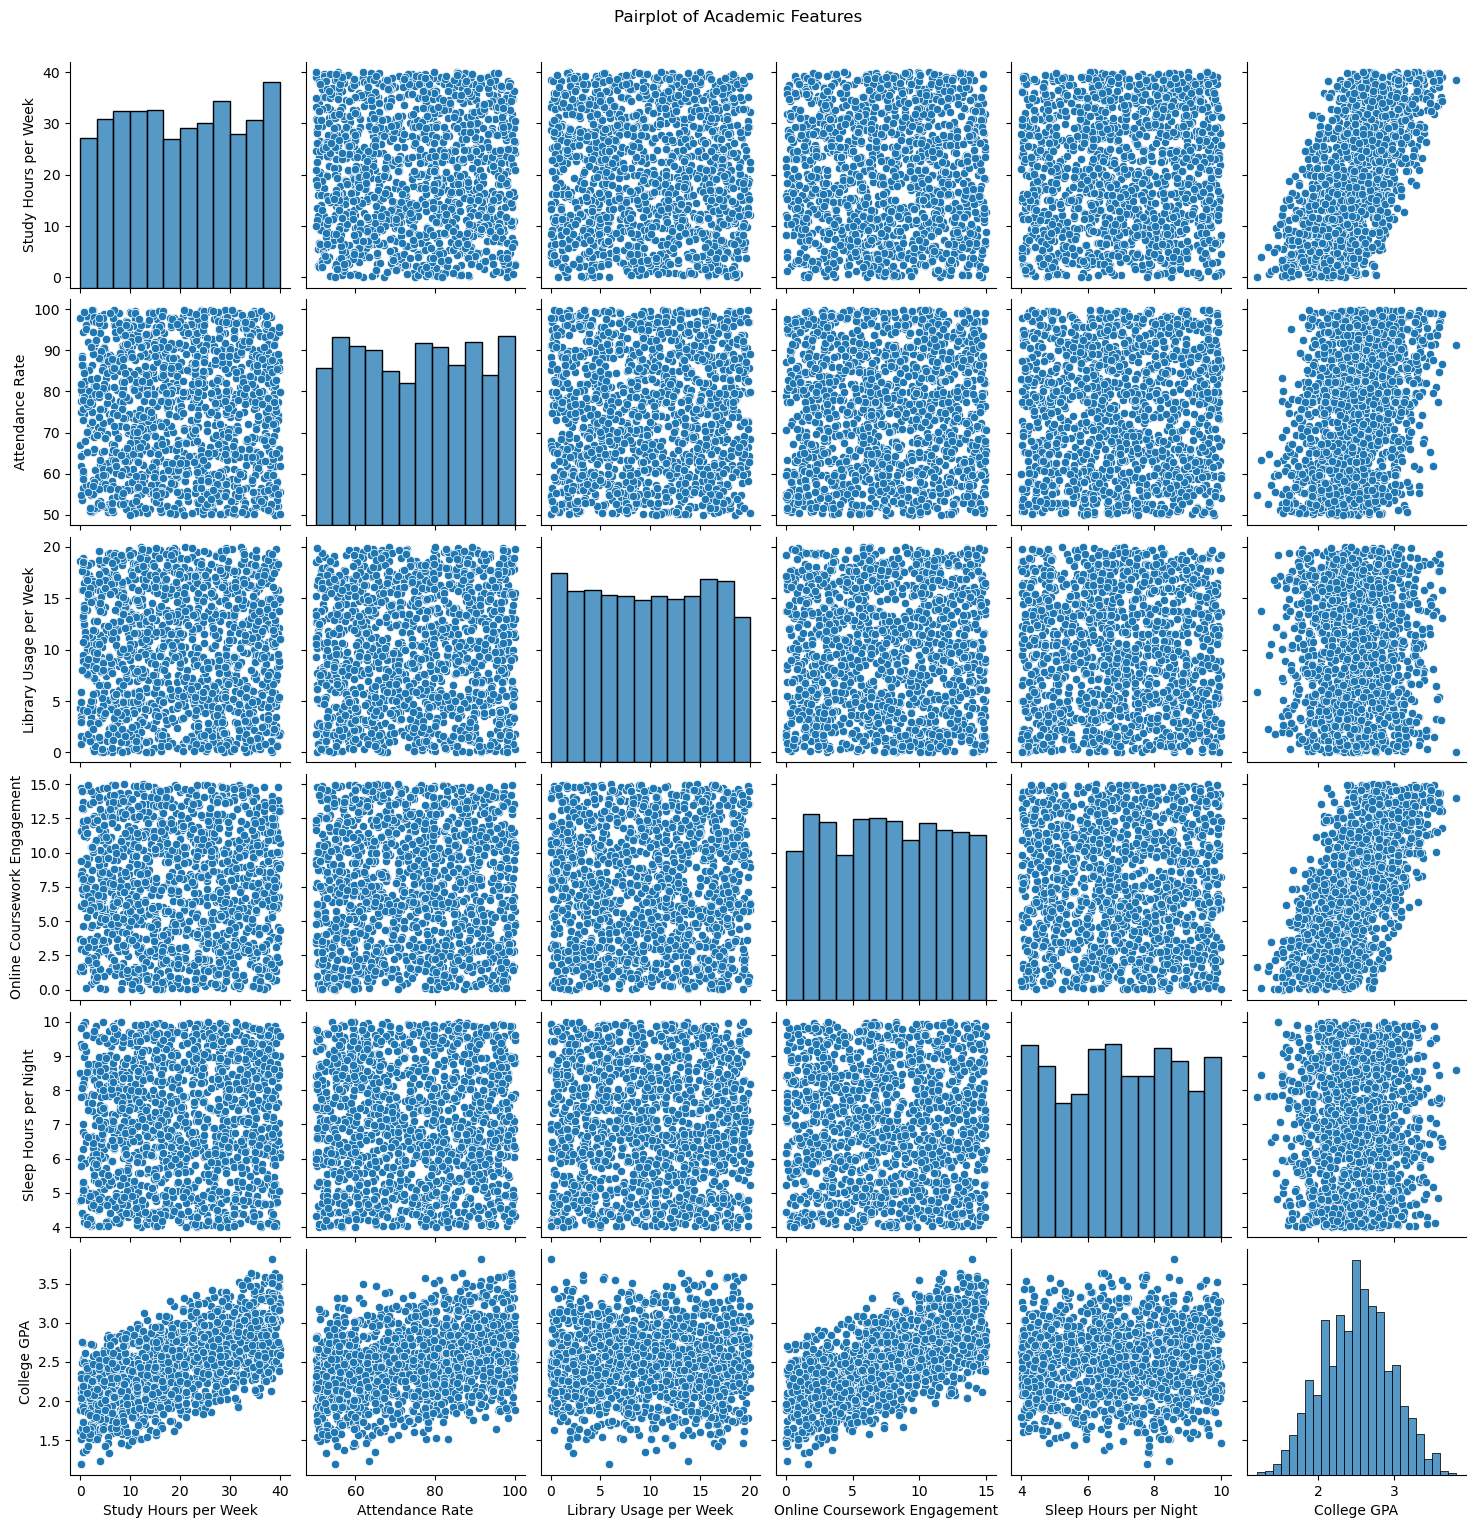

In [58]:
important_cols = [
    'Study Hours per Week', 'Attendance Rate', 
    'Library Usage per Week', 'Online Coursework Engagement', 
    'Sleep Hours per Night', 'College GPA'
]

sns.pairplot(df[important_cols])
plt.suptitle("Pairplot of Academic Features", y=1.02)
plt.show()

 # Data Preprocessing for Machine Learning
 **Data Encoding & Splitting**

Before training the models, we performed the following preprocessing steps:

#### Label Encoding:
- Categorical columns like **Major** and **Part-Time Job** were converted to numeric using `LabelEncoder`.

#### Missing Value Handling:
- All rows with missing values were removed using `df.dropna()` to ensure clean input for the models.

####  Feature & Target Separation:
- **X (Features):** All columns except `College GPA`
- **y (Target):** `College GPA`

####  Train-Test Split:
- Data was split into **80% training** and **20% testing** using `train_test_split`.
- `random_state=42` ensures reproducibility of results.

Shapes of the resulting datasets were printed to verify the split.


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np


df = df.dropna()

categorical_cols = ['Major', 'Part-Time Job']
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


X = df.drop("College GPA", axis=1)
y = df["College GPA"]

# 🔹 Split Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


print("✅ Training Features Shape:", X_train.shape)
print("✅ Test Features Shape:", X_test.shape)
print("✅ Training Labels Shape:", y_train.shape)
print("✅ Test Labels Shape:", y_test.shape)


✅ Training Features Shape: (1273, 9)
✅ Test Features Shape: (319, 9)
✅ Training Labels Shape: (1273,)
✅ Test Labels Shape: (319,)


# Linear Regression Model Training and Prediction

We are using the **Linear Regression** algorithm from **Scikit-learn** to train a predictive model.
- **`LinearRegression()`**: Initializes a linear regression model.
- **`lr.fit(X_train, y_train)`**: Trains the model using the **training data** (features `X_train` and target `y_train`).
- **`y_pred_lr = lr.predict(X_test)`**: Uses the **trained model** to predict the target values for the **test set**.


In [78]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)


# Step 6: Evaluate the Model
We'll use **MAE**, **MSE**, and **RMSE** as evaluation metrics.

We will evaluate the model performance using the following **regression metrics**:

- **MAE (Mean Absolute Error)**  
  - Measures the **average absolute difference** between actual and predicted values.  
  - Lower values indicate **better performance**.  
  
- **MSE (Mean Squared Error)**  
  - Measures the **average of squared errors** between actual and predicted values.  
  - Penalizes **larger errors** more than MAE.  

- **RMSE (Root Mean Squared Error)**  
  - The **square root of MSE**, brings error to the same unit as the target variable.  
  - Easier to interpret compared to MSE.  
  


In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)


print("Linear Regression Evaluation:")
print("MAE:", mae_lr)
print("MSE:", mse_lr)
print("RMSE:", rmse_lr)


Linear Regression Evaluation:
MAE: 0.0025541350400592484
MSE: 8.747511356550725e-06
RMSE: 0.0029576192041151487


# Support Vector Regressor (SVR)

In [63]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


try:
    svr = SVR(kernel='rbf')
    svr.fit(X_train, y_train)

    y_pred_svr = svr.predict(X_test)

    mae_svr = mean_absolute_error(y_test, y_pred_svr)
    mse_svr = mean_squared_error(y_test, y_pred_svr)
    rmse_svr = np.sqrt(mse_svr)

    print(" SVR Evaluation:")
    print(" MAE (Mean Absolute Error):", round(mae_svr, 2))
    print(" MSE (Mean Squared Error):", round(mse_svr, 2))
    print(" RMSE (Root Mean Squared Error):", round(rmse_svr, 2))

except NameError as e:
    print(" Error: Make sure 'X_train', 'X_test', 'y_train', and 'y_test' are defined.")
    print(e)

except Exception as e:
    print(" An unexpected error occurred during SVR evaluation:")
    print(e)


 SVR Evaluation:
 MAE (Mean Absolute Error): 0.08
 MSE (Mean Squared Error): 0.01
 RMSE (Root Mean Squared Error): 0.09


# Stochastic Gradient Descent (SGDRegressor)


In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SGD Regressor on scaled data
sgd = SGDRegressor(max_iter=1000, tol=1e-3, random_state=42)
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)

# Evaluation
mae_sgd = mean_absolute_error(y_test, y_pred_sgd)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_sgd = np.sqrt(mse_sgd)

print("SGD Regressor Evaluation:")
print("MAE:", mae_sgd)
print("MSE:", mse_sgd)
print("RMSE:", rmse_sgd)


SGD Regressor Evaluation:
MAE: 0.0025569807993602403
MSE: 8.76441507380141e-06
RMSE: 0.002960475481033648


# Multi-Layer Perceptron (MLPRegressor)

In [65]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train and evaluate MLP Regressor
try:
    mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)

    y_pred_mlp = mlp.predict(X_test)

    mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
    mse_mlp = mean_squared_error(y_test, y_pred_mlp)
    rmse_mlp = np.sqrt(mse_mlp)

    print(" MLP Regressor Evaluation:")
    print(" MAE (Mean Absolute Error):", round(mae_mlp, 2))
    print(" MSE (Mean Squared Error):", round(mse_mlp, 2))
    print(" RMSE (Root Mean Squared Error):", round(rmse_mlp, 2))

except NameError as e:
    print(" Error: Ensure 'X_train', 'X_test', 'y_train', and 'y_test' are defined.")
    print(e)

except Exception as e:
    print(" An unexpected error occurred during MLP evaluation:")
    print(e)


 MLP Regressor Evaluation:
 MAE (Mean Absolute Error): 0.06
 MSE (Mean Squared Error): 0.01
 RMSE (Root Mean Squared Error): 0.08


 # Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train and evaluate Decision Tree Regressor
try:
    tree = DecisionTreeRegressor(random_state=42)
    tree.fit(X_train, y_train)

    y_pred_tree = tree.predict(X_test)

    mae_tree = mean_absolute_error(y_test, y_pred_tree)
    mse_tree = mean_squared_error(y_test, y_pred_tree)
    rmse_tree = np.sqrt(mse_tree)

    print(" Decision Tree Regressor Evaluation:")
    print(" MAE (Mean Absolute Error):", round(mae_tree, 2))
    print(" MSE (Mean Squared Error):", round(mse_tree, 2))
    print(" RMSE (Root Mean Squared Error):", round(rmse_tree, 2))

except NameError as e:
    print(" Error: Make sure 'X_train', 'X_test', 'y_train', and 'y_test' are defined.")
    print(e)

except Exception as e:
    print(" An unexpected error occurred during Decision Tree evaluation:")
    print(e)


 Decision Tree Regressor Evaluation:
 MAE (Mean Absolute Error): 0.1
 MSE (Mean Squared Error): 0.02
 RMSE (Root Mean Squared Error): 0.13


In [67]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


 # Model Training and Evaluation

### 

In this step, we trained and evaluated several regression models to predict **College GPA** using different machine learning algorithms:

## Models Used:
- **Linear Regression**
- **Support Vector Regressor (SVR)**
- **Stochastic Gradient Descent Regressor (SGD Regressor)**
- **Multi-Layer Perceptron Regressor (MLP Regressor)**
- **Decision Tree Regressor**

## For each model, the following evaluation metrics were calculated:
- **MAE (Mean Absolute Error):** Average of absolute errors between actual and predicted values.
- **MSE (Mean Squared Error):** Average of squared errors, penalizing larger errors more.
- **RMSE (Root Mean Squared Error):** Square root of MSE, bringing error to same scale as target.

The evaluation was done using the **test set**, and the results were saved in a DataFrame for comparison.


In [70]:

models = {
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "SGD Regressor": SGDRegressor(max_iter=1000, tol=1e-3),
    "MLP Regressor": MLPRegressor(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
}

results = []


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)

    results.append({
        "Model": name,
        "MAE": round(mae, 3),
        "MSE": round(mse, 3),
        "RMSE": round(rmse, 3)
    })


results_df = pd.DataFrame(results)


print(results_df)


               Model           MAE           MSE          RMSE
0  Linear Regression  3.000000e-03  0.000000e+00  3.000000e-03
1                SVR  7.800000e-02  8.000000e-03  8.800000e-02
2      SGD Regressor  2.367316e+12  5.880977e+24  2.425073e+12
3      MLP Regressor  5.600000e-02  6.000000e-03  7.600000e-02
4      Decision Tree  1.000000e-01  1.800000e-02  1.340000e-01


 # Plot Actual vs Predicted for Linear Regression:

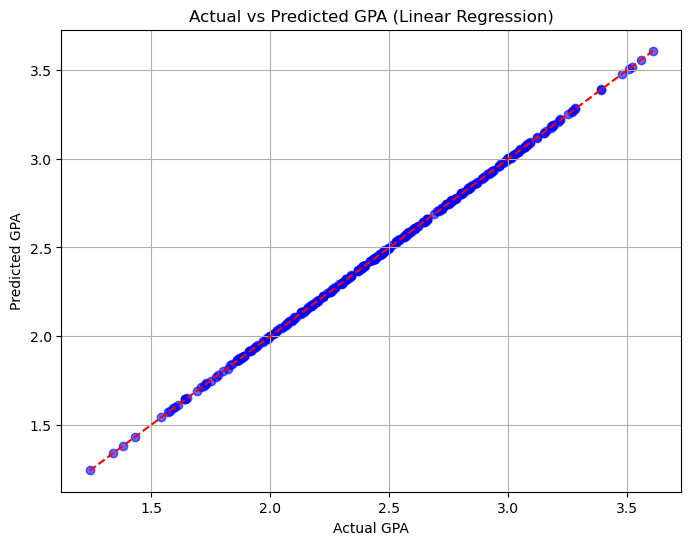

In [71]:
import matplotlib.pyplot as plt

y_pred_lr = models["Linear Regression"].predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lr, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA (Linear Regression)")
plt.grid(True)
plt.show()


# Create Comparison Table of Actual vs Predicted GPA



In [79]:
comparison_df = pd.DataFrame({
    "Actual GPA": y_test,
    "Predicted GPA": y_pred_lr
})

print(comparison_df.head(20))


      Actual GPA  Predicted GPA
1145        1.87       1.872809
1456        2.83       2.830550
1879        2.47       2.464917
444         1.57       1.569136
1858        2.13       2.134932
124         2.07       2.065859
1709        2.32       2.317826
694         1.94       1.936447
1347        3.07       3.068577
851         3.07       3.067680
757         1.89       1.888236
390         1.71       1.714130
738         1.91       1.913670
1964        2.58       2.577724
1614        2.51       2.511367
850         2.72       2.715058
37          1.83       1.834014
311         1.34       1.342290
1109        2.98       2.978917
1401        2.37       2.373759


# Visual Comparison of Model Errors (MAE, MSE, RMSE)

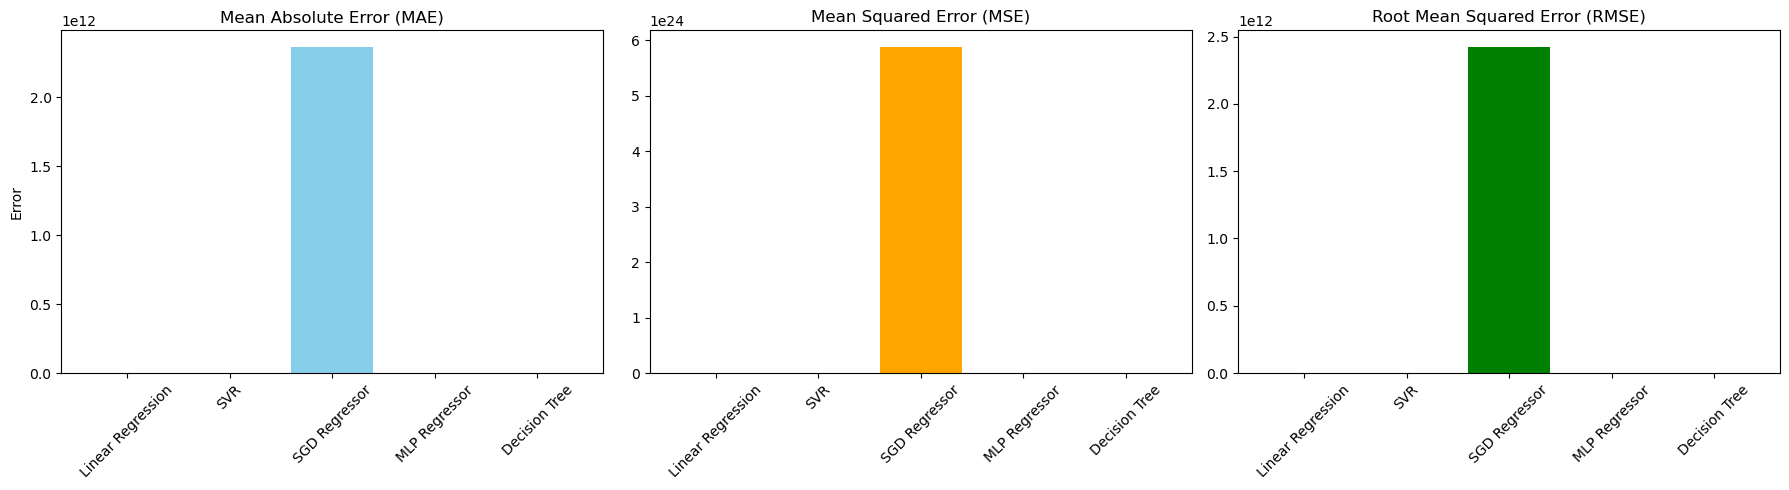

In [80]:
import matplotlib.pyplot as plt


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


axes[0].bar(results_df["Model"], results_df["MAE"], color='skyblue')
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("Error")
axes[0].tick_params(axis='x', rotation=45)

# Plot MSE
axes[1].bar(results_df["Model"], results_df["MSE"], color='orange')
axes[1].set_title("Mean Squared Error (MSE)")
axes[1].tick_params(axis='x', rotation=45)

# Plot RMSE
axes[2].bar(results_df["Model"], results_df["RMSE"], color='green')
axes[2].set_title("Root Mean Squared Error (RMSE)")
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# Line Plot: Actual vs Predicted GPA

- This plot shows the **comparison between actual and predicted GPA values** for the first 50 samples.
- It helps visualize how well the model (Decision Tree) is performing.
- **Blue line (circles)** represents actual GPA values.
- **Orange dashed line (squares)** represents GPA predicted by the model.
- A close match between the two lines indicates **good prediction accuracy**.

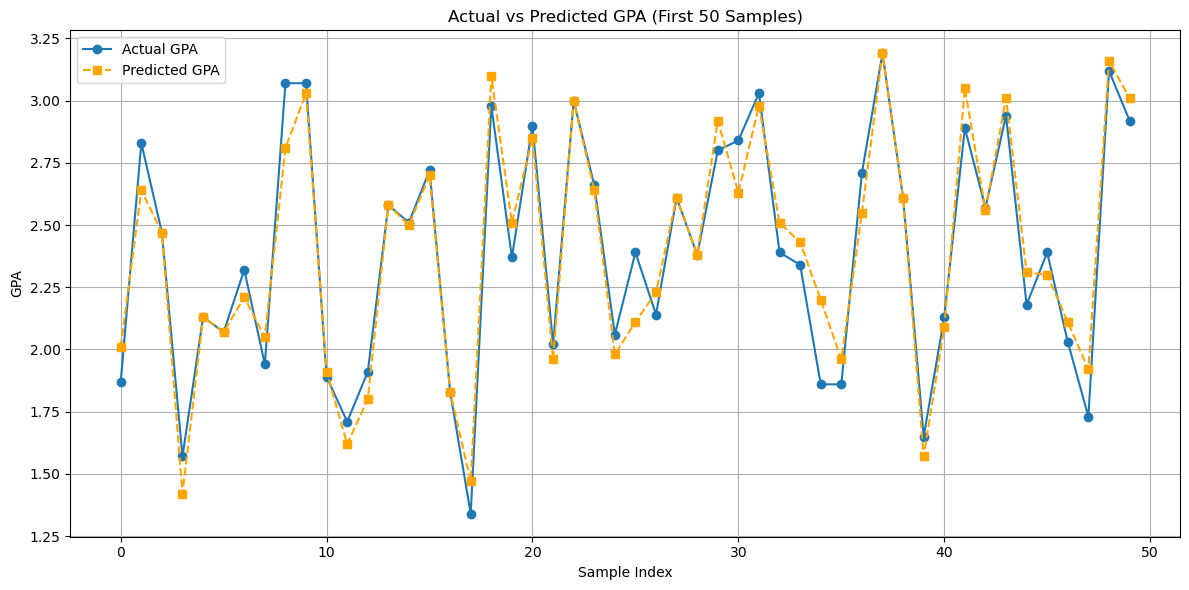

In [83]:
import matplotlib.pyplot as plt

# Plotting first 50 values of actual vs predicted GPA using Decision Tree
plt.figure(figsize=(12, 6))

# Actual GPA values
plt.plot(y_test[:50].values, label="Actual GPA", marker='o')

# Predicted GPA from Decision Tree model
plt.plot(y_pred_tree[:50], label="Predicted GPA", marker='s', linestyle='--', color='orange')

plt.title("Actual vs Predicted GPA (First 50 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("GPA")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
